#Problem Set 4
#### Cameron Smith


## Question 1

#### Precision Recall and F1 Score

In a classification task where any given prediction can either be negative or positive (for example, does this image contain a dog?) we can group all possible predictions into four different catogries
1. True positive - a positive case that was predicted to be positive (hit)
2. True negative - a negative case that was predicted to be negative (correct rejection)
3. False positive - a negative case that was predicted to be positive (false alarm)
4. False negative - a positive case that was predicted to be negative (miss).

Precision is than the fraction of cases that were classified as positive that were in fact positive (how "precise" our positive predictions were), i.e.
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}\,,
$$
while recall is the fraction of positive cases that were classified as positive (how "sensitive" we were to a positive case), i.e.
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}\,.
$$


The following image demonstrates the difference between the two:

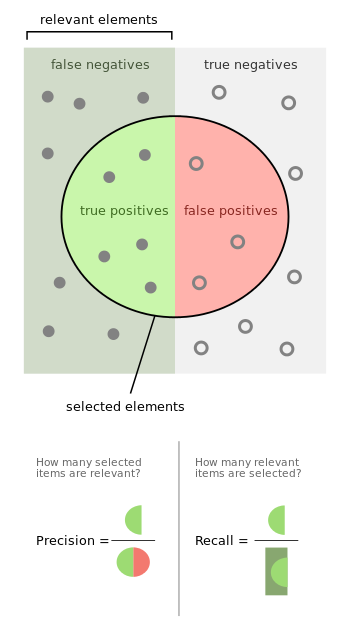

The $F_1$ Score is the harmonic mean of the precision and the recall, which gives a measure of the accuracy of classification. The $F_1$ score has a range between $0$ - which indicates either $0$ precision or $0$ recall - and $1$ - which represents perfect precision and recall.  It is calculated by:
$$
F_1 = 2\cdot \frac{\text{Precision} \cdot \text{recall}}{\text{Precision} + \text{recall}} \, .
$$

#### Regularisation

In machine learning, the goal of regression is to fit a model to some data. Specifically we want to find parameters $\mathbf{\theta}$ such that the model $f(\mathbf{x}, \mathbf{\theta})$ makes the best fit for the data $(\mathbf{x}, \mathbf{y})$, by minimising some 'cost function' for example:
$$
l(x, y) = E[(f(x, \theta) - y)^2]
$$

However if we have many parameters, minimising a cost function such as this could result in 'overfitting' the data, where the model only fits the training data points and does not generalise to any data it hasn't seen. For example in the image below, both green and blue lines perfectly fit the given data points, however blue is an overfit would very likely be a bad fit for any new data. I.e. the overfitted line has learnt the data points, not the relationship.

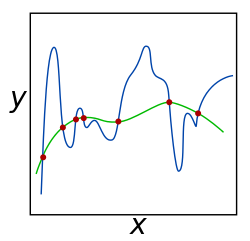

To avoid this, we want to prioritise simpler models, where as few parameters as possible are effectively used, while still making a good fit to the data. This is called regularisation.

In both LASSO and Ridge regression, we add a new term to the cost function which adds a penalty dependent on the size of the parameters, with larger valued parameters (which have a large impact on the model) having a larger penalty and smaller valued parameters (which have a smaller impact on the model) have a smaller penalty. Therefore the optimal model will only 'include' parameters that significantly reduce the value of $(f(x) - y)^2$.

In LASSO regularisation, our cost function becomes:
$$
l(x, y) = E[(f(x, \theta) - y)^2] + \lambda E[|\theta|]
$$

where $\lambda$ is a scaling factor which determines how much the average paramer value should impact the cost function. Similarly, for Ridge regression, we have:

$$
l(x, y) = E[(f(x, \theta) - y)^2] + \lambda E[|\theta^2|]
$$

While in LASSO regularisation any reduction in parameter size gives the same 'reward' (i.e. decrease in cost function), while in ridge regression the reward gets smaller the closer the parameter is to zero.

#### Confusion Matrix

In classification, a confusion matrix gives a visulisation of how well a classification algorithm has performed. The columns of the matrix correspond to the predicted classes while the rows correspond to the actual classes, such that each component of the matrix $C_{i,j}$ gives the number items predicted to be in class $j$ that were actually in class $i$. For example, the following confusion matrix shows the communication of a whistled language ([yes this is a real thing](https://en.wikipedia.org/wiki/Whistled_language)) between two people, with zero values ommited:

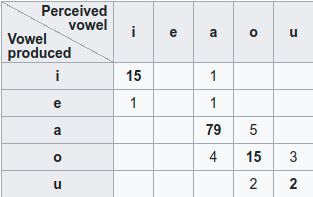

In the case of binary classification, the confusion matrix is given by:

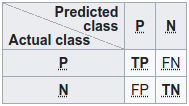

Where TP, FN, FP and TN are the True Positive, False Negative, False Positive and True Negative as previously defined.

## Question 2

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)

In [4]:
# Who are these people?!
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


In [5]:
# What do their faces look like?
print(faces.images.shape)

(1560, 62, 47)


In [6]:
# The target name index for each image (0 = Ariel Sharon, etc)
print(faces.target.shape)

(1560,)


In [7]:
print(faces.target)

[11  4  2 ...  3 11  5]


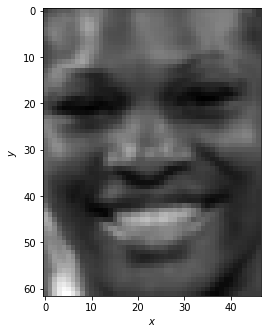

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4.75))
ax.imshow(faces.images[12], cmap="binary_r")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
fig.tight_layout()

### Task one

Install PCA and run on the images to find the first 150 principle components:

In [31]:
import numpy as np
from sklearn.decomposition import PCA
# get the PCA model (with random solver) and fit on face data:
pca = PCA(150, svd_solver='randomized').fit(faces.data)

Get components:

In [17]:
components = pca.components_
components.shape

(150, 2914)

Now we plot the first 50:

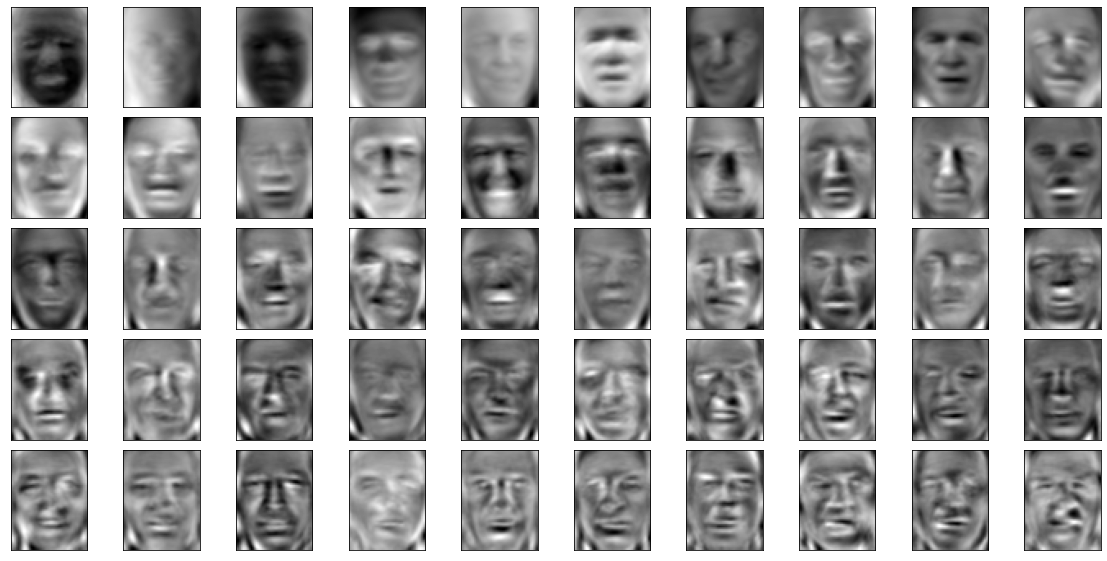

In [64]:
# reshape into image:
shape = (150, *faces.images.shape[1:])
components = components.reshape(shape)

# setup fig
fig, axes = plt.subplots(5, 10, figsize=(20, 10),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

# plot
for i, ax in enumerate(axes.flat):
    ax.imshow(components[i], cmap='binary_r')
fig.show()

Pretty Creepy.

### Task two

Let's find how much variance these 50 components account for:

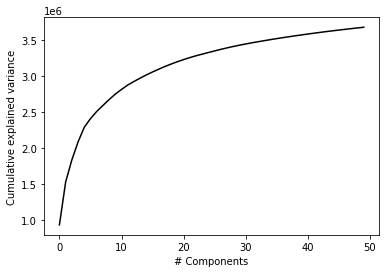

In [34]:
# get explained variance for each component
ev = pca.explained_variance_
# cumulative explained variance for first 50 components:
cum_ev = np.cumsum(ev)[:50]
# and plot
plt.plot(cum_ev, c='k')
plt.xlabel("# Components")
plt.ylabel(r"Cumulative explained variance")
plt.show();

### Task Three

Project onto faces (i.e. find first 150 principle components of each face)

In [39]:
individual_components = pca.transform(faces.data)
# check that this is sensible
individual_components.shape

(1560, 150)

Get index of the faces we want:

In [77]:
# number of people:
n = len(faces.target_names)
# target index of people
person_index = np.arange(n)
# random index in face list corresponeing to each person
face_index = list([np.random.choice(np.where(faces.target == i)[0]) for i in person_index])
# components of each of these faces
face_components = individual_components[face_index]
# reconstruct the faces:
reconstructed_faces = pca.inverse_transform(face_components)

And now we plot:

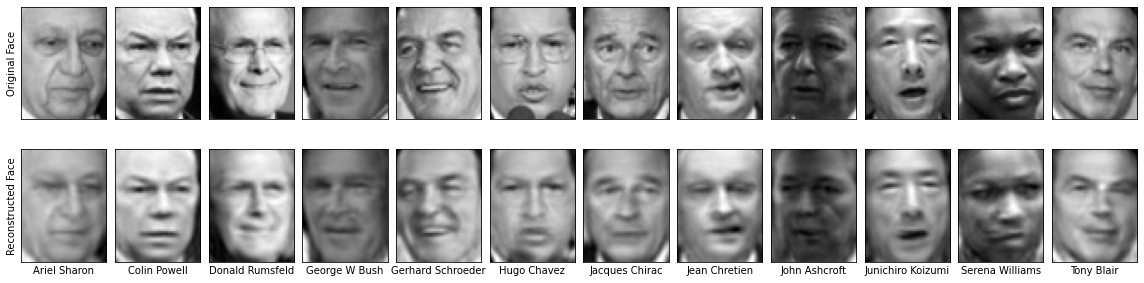

In [76]:
# setup fig
fig, axes = plt.subplots(2, n, figsize=(20, 5),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, f in enumerate(face_index):
  name = faces.target_names[i]
  face = faces.images[f]
  new_face = reconstructed_faces[i].reshape(62, 47)
  axes[0, i].imshow(face, cmap='binary_r')
  axes[1, i].imshow(new_face, cmap='binary_r')
  axes[1, i].set_xlabel(name)
axes[0,0].set_ylabel("Original Face")
axes[1,0].set_ylabel("Reconstructed Face");

Looks like they've all seen better days.